In [ ]:
!pip install fastdtw==0.3.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 23.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fastdtw: filename=fastdtw-0.3.4-py3-none-any.whl size=3564 sha256=8b5fd4f26e42c861bd95b22566740b1a287b046f90c3e70abf5bcae9756ab069
  Stored in directory: /root/.cache/pip/wheels/73/c8/f7/c25448dab74c3acf4848bc25d513c736bb93910277e1528ef4
Successfully built fastdtw

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%pip install statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose, DecomposeResult
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
from fastdtw import fastdtw

# suppress all warnings
import warnings
warnings.filterwarnings("ignore")


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
cases = pd.read_csv('FluView_LineChart_Data.csv', skiprows=1)
vaccines = pd.read_csv('Weekly_Cumulative_Doses.csv')

In [ ]:
cases.head()

,YEAR,WEEK,AGE 0-4,AGE 5-24,AGE 25-49,AGE 25-64,AGE 50-64,AGE 65,ILITOTAL,TOTAL PATIENTS,NUM. OF PROVIDERS,%UNWEIGHTED ILI,% WEIGHTED ILI
0,2018,40,4857,6300,3839,X,1553,1290,17839,1252483,2565,1.42429,1.41846
1,2018,41,5307,6250,4026,X,1657,1321,18561,1252846,2609,1.48151,1.40418
2,2018,42,5582,6799,4399,X,1752,1398,19930,1249933,2586,1.59449,1.47401
3,2018,43,6242,7478,4617,X,1835,1444,21616,1251776,2646,1.72683,1.64257
4,2018,44,6864,8285,4730,X,1825,1450,23154,1254812,2633,1.84522,1.79275


In [ ]:
vaccines.head()

,Influenza_Season,Start_Date,End_Date,Reporting_Timeframe,Week,Week_Sort_Order,Current_Season_Week_Ending_Label,Cumulative_Flu_Doses_Distributed,Current_Through
0,2018-2019,07/29/2018,08/04/2018,2018-07-29 - 2018-08-04,30,1,08/05/2023,0.52,03/04/2023
1,2018-2019,08/05/2018,08/11/2018,2018-08-05 - 2018-08-11,31,2,08/12/2023,3.23,03/04/2023
2,2018-2019,08/12/2018,08/18/2018,2018-08-12 - 2018-08-18,32,3,08/19/2023,10.18,03/04/2023
3,2018-2019,08/19/2018,08/25/2018,2018-08-19 - 2018-08-25,33,4,08/26/2023,19.99,03/04/2023
4,2018-2019,08/26/2018,09/01/2018,2018-08-26 - 2018-09-01,34,5,09/02/2023,37.38,03/04/2023


In [ ]:
vaccines

,Influenza_Season,Start_Date,End_Date,Reporting_Timeframe,Week,Week_Sort_Order,Current_Season_Week_Ending_Label,Cumulative_Flu_Doses_Distributed,Current_Through
0,2018-2019,07/29/2018,08/04/2018,2018-07-29 - 2018-08-04,30,1,08/05/2023,0.52,03/04/2023
1,2018-2019,08/05/2018,08/11/2018,2018-08-05 - 2018-08-11,31,2,08/12/2023,3.23,03/04/2023
2,2018-2019,08/12/2018,08/18/2018,2018-08-12 - 2018-08-18,32,3,08/19/2023,10.18,03/04/2023
3,2018-2019,08/19/2018,08/25/2018,2018-08-19 - 2018-08-25,33,4,08/26/2023,19.99,03/04/2023
4,2018-2019,08/26/2018,09/01/2018,2018-08-26 - 2018-09-01,34,5,09/02/2023,37.38,03/04/2023
...,...,...,...,...,...,...,...,...,...
169,2023-2024,09/24/2023,09/30/2023,2023-09-24 - 2023-09-30,39,10,09/30/2023,116.29,10/28/2023
170,2023-2024,10/01/2023,10/07/2023,2023-10-01 - 2023-10-07,40,11,10/07/2023,128.35,10/28/2023
171,2023-2024,10/08/2023,10/14/2023,2023-10-08 - 2023-10-14,41,12,10/14/2023,136.94,10/28/2023
172,2023-2024,10/15/2023,10/21/2023,2023-10-15 - 2023-10-21,42,13,10/21/2023,142.16,10/28/2023


In [ ]:
DeepnoteChart(vaccines, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","color":"#4c78a8","tooltip":true},"encoding":{"x":{"sort":null,"type":"quantitative","field":"Week","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"y":{"sort":null,"type":"quantitative","field":"Cumulative_Flu_Doses_Distributed","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{}}""")

In [ ]:
vaccines['FLU_DOSES'] = vaccines['Cumulative_Flu_Doses_Distributed'].diff()
vaccines['FLU_DOSES'] = vaccines['FLU_DOSES'].fillna(vaccines['Cumulative_Flu_Doses_Distributed'])
vaccines['FLU_DOSES'] = vaccines['FLU_DOSES']*1000000


In [ ]:
vaccines

,Influenza_Season,Start_Date,End_Date,Reporting_Timeframe,Week,Week_Sort_Order,Current_Season_Week_Ending_Label,Cumulative_Flu_Doses_Distributed,Current_Through,FLU_DOSES
0,2018-2019,07/29/2018,08/04/2018,2018-07-29 - 2018-08-04,30,1,08/05/2023,0.52,03/04/2023,520000.0
1,2018-2019,08/05/2018,08/11/2018,2018-08-05 - 2018-08-11,31,2,08/12/2023,3.23,03/04/2023,2710000.0
2,2018-2019,08/12/2018,08/18/2018,2018-08-12 - 2018-08-18,32,3,08/19/2023,10.18,03/04/2023,6950000.0
3,2018-2019,08/19/2018,08/25/2018,2018-08-19 - 2018-08-25,33,4,08/26/2023,19.99,03/04/2023,9810000.0
4,2018-2019,08/26/2018,09/01/2018,2018-08-26 - 2018-09-01,34,5,09/02/2023,37.38,03/04/2023,17390000.0
...,...,...,...,...,...,...,...,...,...,...
169,2023-2024,09/24/2023,09/30/2023,2023-09-24 - 2023-09-30,39,10,09/30/2023,116.29,10/28/2023,15780000.0
170,2023-2024,10/01/2023,10/07/2023,2023-10-01 - 2023-10-07,40,11,10/07/2023,128.35,10/28/2023,12060000.0
171,2023-2024,10/08/2023,10/14/2023,2023-10-08 - 2023-10-14,41,12,10/14/2023,136.94,10/28/2023,8590000.0
172,2023-2024,10/15/2023,10/21/2023,2023-10-15 - 2023-10-21,42,13,10/21/2023,142.16,10/28/2023,5220000.0


In [ ]:
for index, row in vaccines.iterrows():
    if row['Week_Sort_Order'] == 1:
        if row['FLU_DOSES'] != row['Cumulative_Flu_Doses_Distributed']:
            # Update the value and multiply by 1,000,000
            vaccines.at[index, 'FLU_DOSES'] = row['Cumulative_Flu_Doses_Distributed'] * 1000000


In [ ]:
vaccines

,Influenza_Season,Start_Date,End_Date,Reporting_Timeframe,Week,Week_Sort_Order,Current_Season_Week_Ending_Label,Cumulative_Flu_Doses_Distributed,Current_Through,FLU_DOSES
0,2018-2019,07/29/2018,08/04/2018,2018-07-29 - 2018-08-04,30,1,08/05/2023,0.52,03/04/2023,520000.0
1,2018-2019,08/05/2018,08/11/2018,2018-08-05 - 2018-08-11,31,2,08/12/2023,3.23,03/04/2023,2710000.0
2,2018-2019,08/12/2018,08/18/2018,2018-08-12 - 2018-08-18,32,3,08/19/2023,10.18,03/04/2023,6950000.0
3,2018-2019,08/19/2018,08/25/2018,2018-08-19 - 2018-08-25,33,4,08/26/2023,19.99,03/04/2023,9810000.0
4,2018-2019,08/26/2018,09/01/2018,2018-08-26 - 2018-09-01,34,5,09/02/2023,37.38,03/04/2023,17390000.0
...,...,...,...,...,...,...,...,...,...,...
169,2023-2024,09/24/2023,09/30/2023,2023-09-24 - 2023-09-30,39,10,09/30/2023,116.29,10/28/2023,15780000.0
170,2023-2024,10/01/2023,10/07/2023,2023-10-01 - 2023-10-07,40,11,10/07/2023,128.35,10/28/2023,12060000.0
171,2023-2024,10/08/2023,10/14/2023,2023-10-08 - 2023-10-14,41,12,10/14/2023,136.94,10/28/2023,8590000.0
172,2023-2024,10/15/2023,10/21/2023,2023-10-15 - 2023-10-21,42,13,10/21/2023,142.16,10/28/2023,5220000.0


In [ ]:
# Dropping unnecessary columns
cases = cases[['YEAR', 'WEEK', 'ILITOTAL', '% WEIGHTED ILI']]
vaccines = vaccines[['Influenza_Season', 'End_Date', 'Week', 'FLU_DOSES', 'Cumulative_Flu_Doses_Distributed']]

<img src="image-20231128-174254.png" width="" align="" />

In [ ]:
cases.head()

,YEAR,WEEK,ILITOTAL,% WEIGHTED ILI
0,2018,40,17839,1.41846
1,2018,41,18561,1.40418
2,2018,42,19930,1.47401
3,2018,43,21616,1.64257
4,2018,44,23154,1.79275


In [ ]:
vaccines['End_Date'] = pd.to_datetime(vaccines['End_Date'])
vaccines['YEAR'] = vaccines['End_Date'].dt.year

In [ ]:
vaccines.head()

,Influenza_Season,End_Date,Week,FLU_DOSES,Cumulative_Flu_Doses_Distributed,YEAR
0,2018-2019,2018-08-04,30,520000.0,0.52,2018
1,2018-2019,2018-08-11,31,2710000.0,3.23,2018
2,2018-2019,2018-08-18,32,6950000.0,10.18,2018
3,2018-2019,2018-08-25,33,9810000.0,19.99,2018
4,2018-2019,2018-09-01,34,17390000.0,37.38,2018


In [ ]:
merged_df = pd.merge(vaccines, cases, how='outer', left_on=['Week', 'YEAR'], right_on=['WEEK', 'YEAR'])

In [ ]:
merged_df

,Influenza_Season,End_Date,Week,FLU_DOSES,Cumulative_Flu_Doses_Distributed,YEAR,WEEK,ILITOTAL,% WEIGHTED ILI
0,2018-2019,2018-08-04,30.0,520000.0,0.52,2018,NaN,NaN,NaN
1,2018-2019,2018-08-11,31.0,2710000.0,3.23,2018,NaN,NaN,NaN
2,2018-2019,2018-08-18,32.0,6950000.0,10.18,2018,NaN,NaN,NaN
3,2018-2019,2018-08-25,33.0,9810000.0,19.99,2018,NaN,NaN,NaN
4,2018-2019,2018-09-01,34.0,17390000.0,37.38,2018,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
271,NaN,NaT,NaN,NaN,NaN,2023,25.0,30889.0,1.36728
272,NaN,NaT,NaN,NaN,NaN,2023,26.0,28486.0,1.27620
273,NaN,NaT,NaN,NaN,NaN,2023,27.0,26648.0,1.23526
274,NaN,NaT,NaN,NaN,NaN,2023,28.0,25903.0,1.16290


In [ ]:
merged_df = merged_df.drop(columns=['Week'])

In [ ]:
vaccines.index = pd.to_datetime(vaccines['End_Date'], infer_datetime_format=True)
weekly_flu_doses = vaccines['FLU_DOSES']

In [ ]:
full_date_rng = pd.date_range(start='2018-08-04', end='2023-10-28', freq='W-SAT')
vaccines2 = vaccines.reindex(full_date_rng)
vaccines2
vaccines2['FLU_DOSES'] = vaccines2['FLU_DOSES'].fillna(0)
weekly_flu_doses = vaccines2['FLU_DOSES']

In [ ]:
vaccines2.index.year

Int64Index([2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018,
            ...
            2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023],
           dtype='int64', length=274)

In [ ]:
vaccines2['YEAR'].ffill(inplace=True)
vaccines2['Influenza_Season'].ffill(inplace=True)
vaccines2['Week'].interpolate(inplace=True)
vaccines2


,Influenza_Season,End_Date,Week,FLU_DOSES,Cumulative_Flu_Doses_Distributed,YEAR
2018-08-04,2018-2019,2018-08-04,30.0,520000.0,0.52,2018.0
2018-08-11,2018-2019,2018-08-11,31.0,2710000.0,3.23,2018.0
2018-08-18,2018-2019,2018-08-18,32.0,6950000.0,10.18,2018.0
2018-08-25,2018-2019,2018-08-25,33.0,9810000.0,19.99,2018.0
2018-09-01,2018-2019,2018-09-01,34.0,17390000.0,37.38,2018.0
...,...,...,...,...,...,...
2023-09-30,2023-2024,2023-09-30,39.0,15780000.0,116.29,2023.0
2023-10-07,2023-2024,2023-10-07,40.0,12060000.0,128.35,2023.0
2023-10-14,2023-2024,2023-10-14,41.0,8590000.0,136.94,2023.0
2023-10-21,2023-2024,2023-10-21,42.0,5220000.0,142.16,2023.0


Text(0.5, 1.0, 'Flu Doses Given')

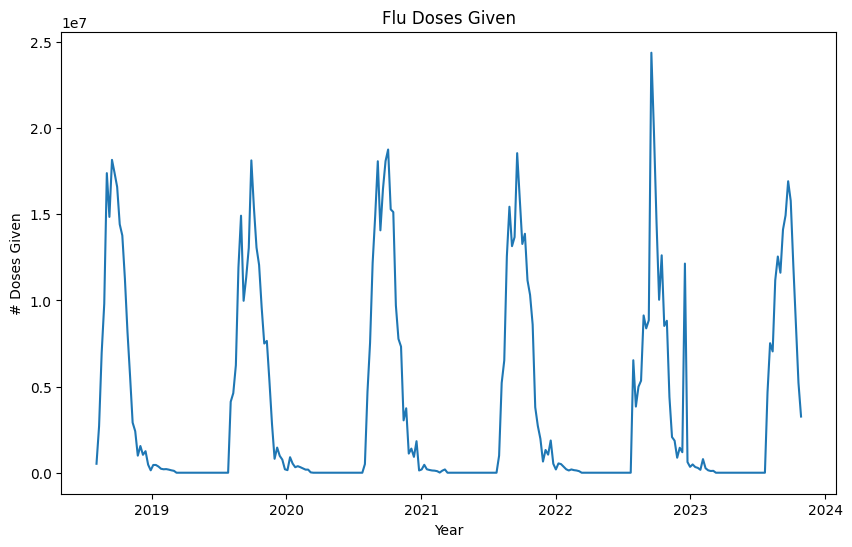

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(weekly_flu_doses)
ax.set_xlabel("Year")
ax.set_ylabel("# Doses Given")
ax.set_title("Flu Doses Given")

In [ ]:
merged_df = pd.merge(vaccines2, cases, how='inner', left_on=['Week', 'YEAR'], right_on=['WEEK', 'YEAR'])
merged_df.index = vaccines2.index[10:]


Text(0.5, 1.0, 'Cases Per Week')

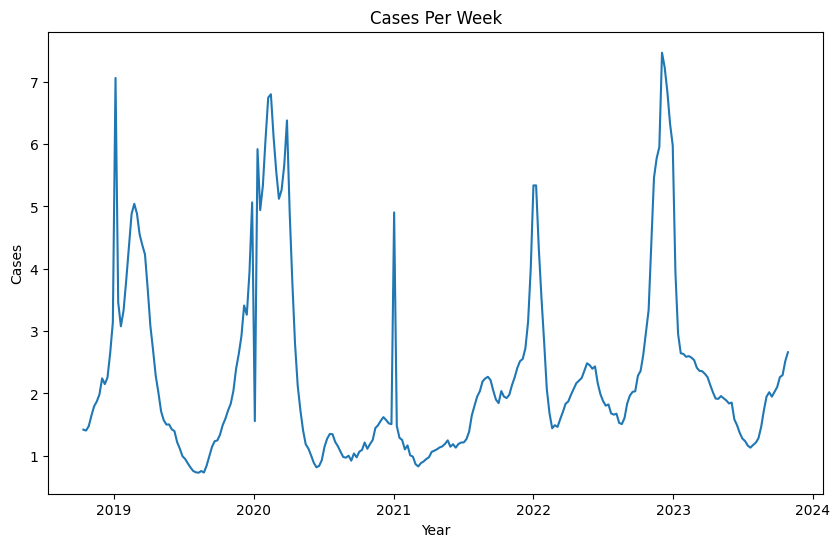

In [ ]:
weekly_cases = merged_df['% WEIGHTED ILI']
#weekly_cases = merged_df['ILITOTAL']
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(weekly_cases)
ax.set_xlabel("Year")
ax.set_ylabel("Cases")
ax.set_title("Cases Per Week")

# Checking for stationarity of time series

In [ ]:
vaccines2.isnull().sum()

Influenza_Season                      0
End_Date                            100
Week                                  0
FLU_DOSES                             0
Cumulative_Flu_Doses_Distributed    100
YEAR                                  0
dtype: int64

In [ ]:
merged_df.isnull().sum()

Influenza_Season                      0
End_Date                            100
Week                                  0
FLU_DOSES                             0
Cumulative_Flu_Doses_Distributed    100
YEAR                                  0
WEEK                                  0
ILITOTAL                              0
dtype: int64

### Conducting an Augmented Dickey-Fuller (ADF) test on vaccine doses distributed and cases from 2018-2023

Critical values are at three different significance levels (1%, 5%, 10%). 

Null hypothesis (H0): The time series has a unit root (a statistical characteristic of a time series variable that indicates it has a stochastic or random trend) and is non-stationary. 

Alternative hypothesis (H1): The time series does not have a unit root, indicating that it is stationary. 

Reject the null if the test statistic is more negative than the critical value. Reject the null if the p-value is less than the significance level. 

In [ ]:
result_vaccines = adfuller(merged_df['FLU_DOSES'])

print('ADF Statistic:', result_vaccines[0])
print('p-value:', result_vaccines[1])
print('Critical Values:', result_vaccines[4])

ADF Statistic: -4.6521523493232175
p-value: 0.00010340704548503538
Critical Values: {'1%': -3.456780859712, '5%': -2.8731715065600003, '10%': -2.572968544}


Because the test statistic is more negative than the critical values and because the p-value is less than 0.05, we reject the null hypothesis. This means that flu does is a stationary time series.

In [ ]:
result_cases = adfuller(merged_df['ILITOTAL'])

print('ADF Statistic:', result_cases[0])
print('p-value:', result_cases[1])
print('Critical Values:', result_cases[4])

ADF Statistic: -3.647117815463165
p-value: 0.0049215600120379194
Critical Values: {'1%': -3.4557539868570775, '5%': -2.8727214497041422, '10%': -2.572728476331361}


Because the test statistic is more negative than the critical values and because the p-value is less than 0.05, we reject the null hypothesis. This mean the cases is a stationary time series. 

In [ ]:
selected_columns = ['FLU_DOSES', 'ILITOTAL']
cosine_df = merged_df[selected_columns].copy()

### Scaling vaccines and cases to prep for cosine similarity

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cosine_df)

cosine_sim = cosine_similarity(scaled_data[:, 0].reshape(1, -1), scaled_data[:, 1].reshape(1, -1))

print(f'Cosine Similarity between FLU_DOSES and ILITOTAL: {cosine_sim[0][0]}')

Cosine Similarity between FLU_DOSES and ILITOTAL: -0.11126818580255521


A cosine similarity of -0.111 suggests a relatively low degree of similarity between the two time series and they have a somewhat opposite direction. 

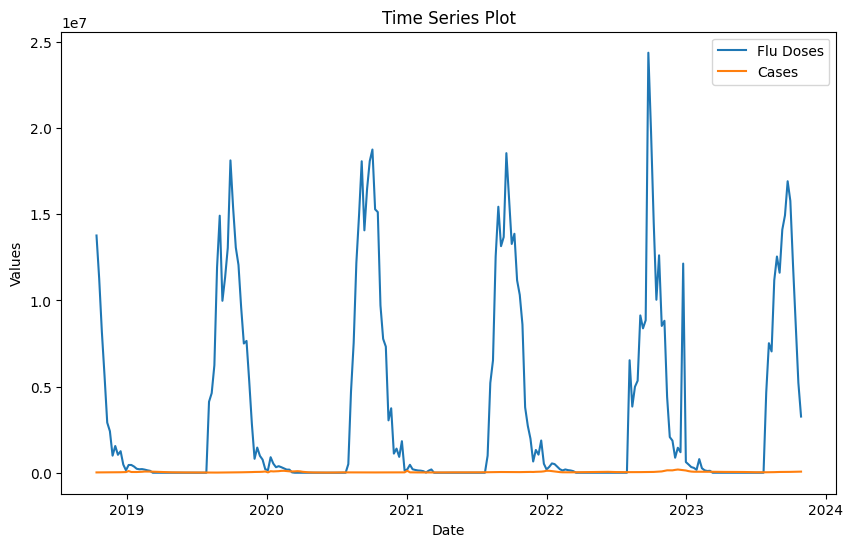

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(merged_df.index, merged_df['FLU_DOSES'], label='Flu Doses')
plt.plot(merged_df.index, merged_df['ILITOTAL'], label='Cases')

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Time Series Plot')
plt.legend()

plt.show()

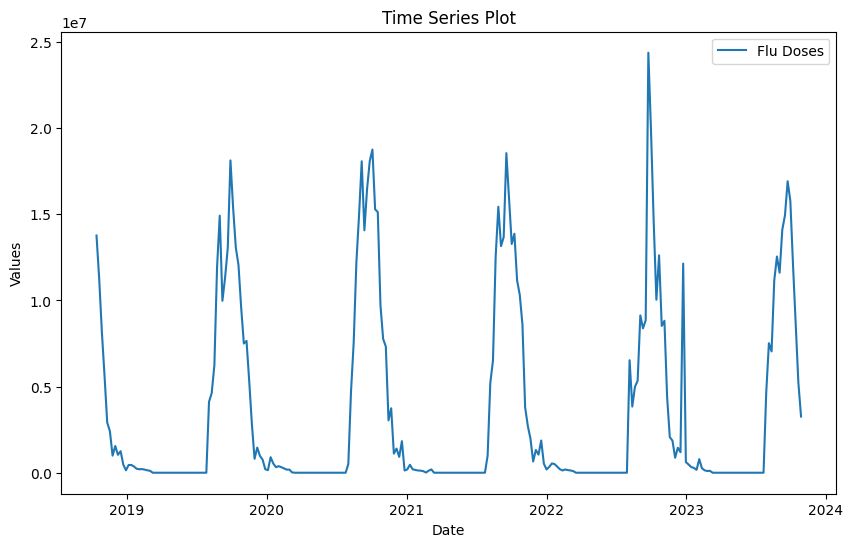

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(merged_df.index, merged_df['FLU_DOSES'], label='Flu Doses')

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Time Series Plot')
plt.legend()

plt.show()

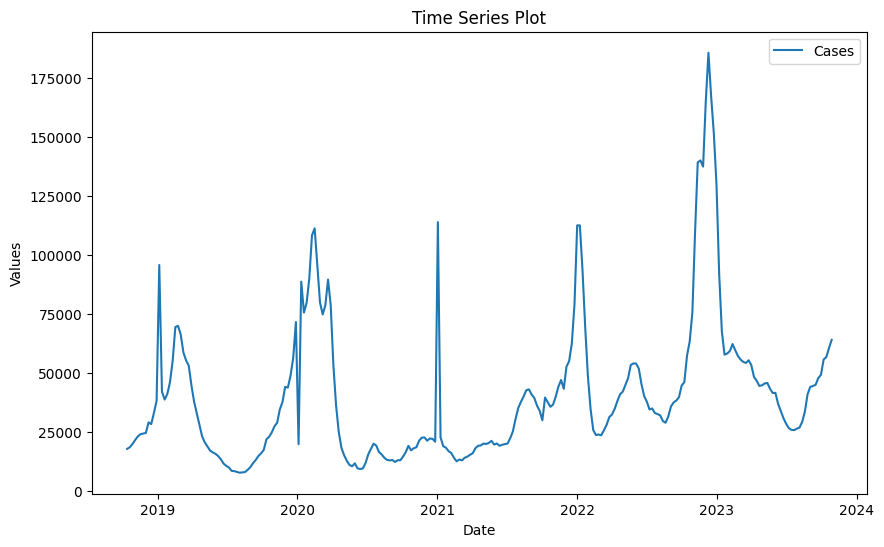

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(merged_df.index, merged_df['ILITOTAL'], label='Cases')

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Time Series Plot')
plt.legend()

plt.show()

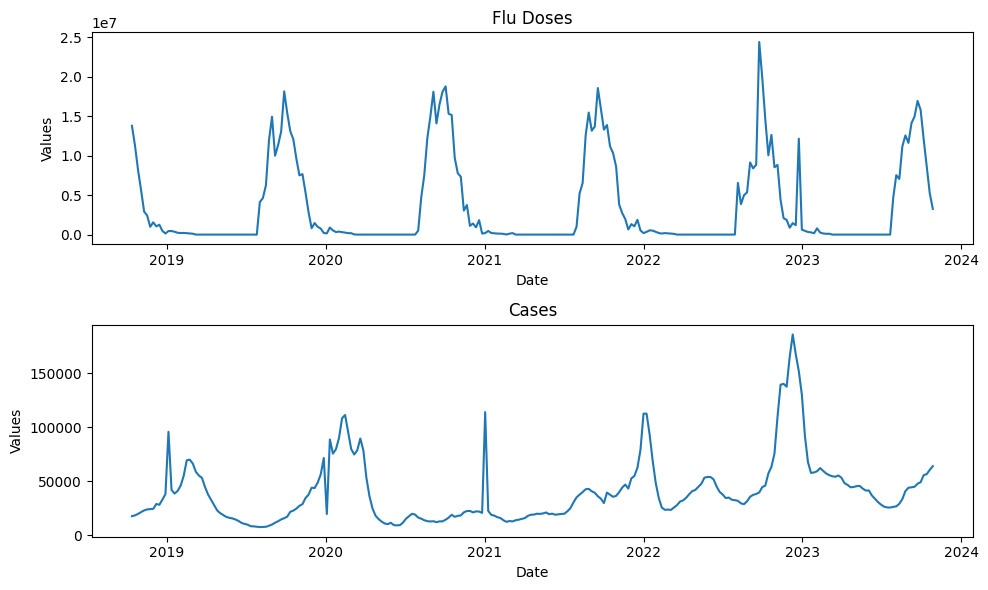

In [ ]:
plt.figure(figsize=(10, 6))

# Subplot 1
plt.subplot(2, 1, 1)  # 2 rows, 1 column, subplot 1
plt.plot(merged_df.index, merged_df['FLU_DOSES'], label='Flu Doses')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Flu Doses')

# Subplot 2
plt.subplot(2, 1, 2)  # 2 rows, 1 column, subplot 2
plt.plot(merged_df.index, merged_df['ILITOTAL'], label='Cases')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Cases')


# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
from scipy.stats import spearmanr
vaccines_ts = np.array(merged_df['FLU_DOSES'])
cases_ts = np.array(merged_df['ILITOTAL'])

correlation, p_value = spearmanr(vaccines_ts, cases_ts)

print(f'Spearman Rank Correlation: {correlation}')
print(f'P-value: {p_value}')

NameError: name 'np' is not defined

The Spearman Rank Correlation coefficient measures the strength and direction of the monotonic relationship between two variables.

A correlation coefficient of 0.073 indicated a weak positive monotonic relationship between the two variables. However, with a p-value of 0.23, we do not reject the null hypothesis. This suggests that there is not enough evidence to conclude that there is a significant monotonic relationship between the two variables. 

In [ ]:
from scipy.stats import pearsonr

correlation, p_value = pearsonr(vaccines_ts, cases_ts)

print(f'Pearson Correlation Coefficient: {correlation}')
print(f'P-value: {p_value}')

Pearson Correlation Coefficient: -0.1112681858025552
P-value: 0.07108660449819872


A Pearson Correlation Coefficient of -0.111 indicates that there is a weak negative linear relationship between the two variables.

With a p-value of 0.071, we would not reject the null hypothesis. There is not enough evidence to reject the null hypothesis of no significant linear relationship. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c7e7b740-ad7d-41a8-9704-cb0c6a8385eb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>